<a href="https://colab.research.google.com/github/Kyrillos1/Leaf-Classification/blob/main/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
import numpy as np 
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import LabelEncoder

## Keras Libraries for Neural Networks
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

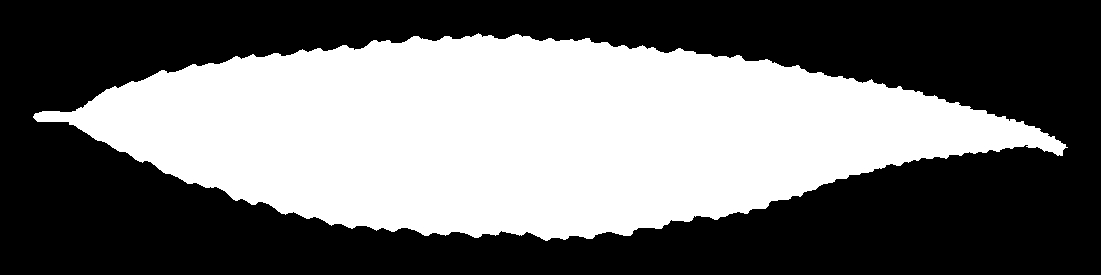

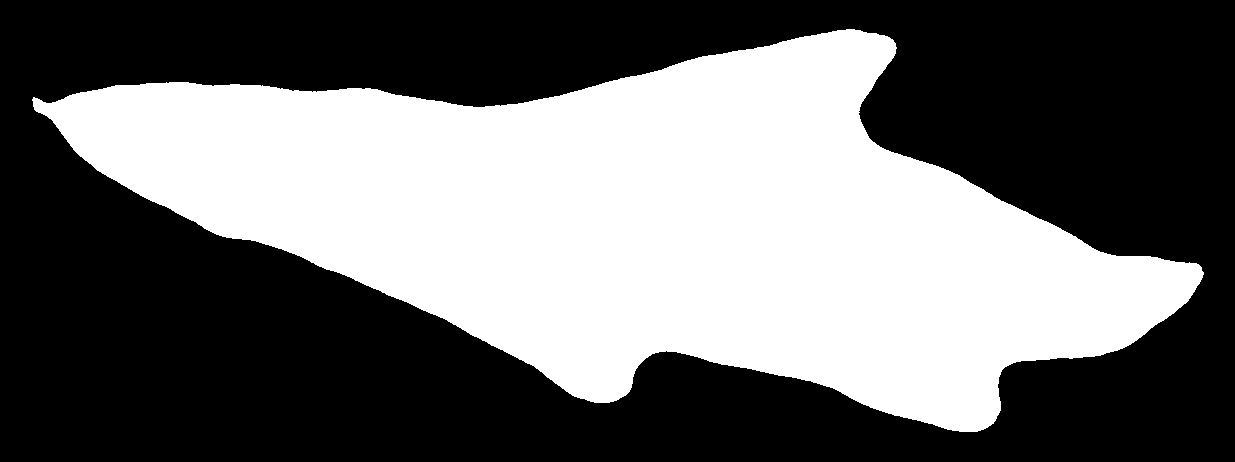

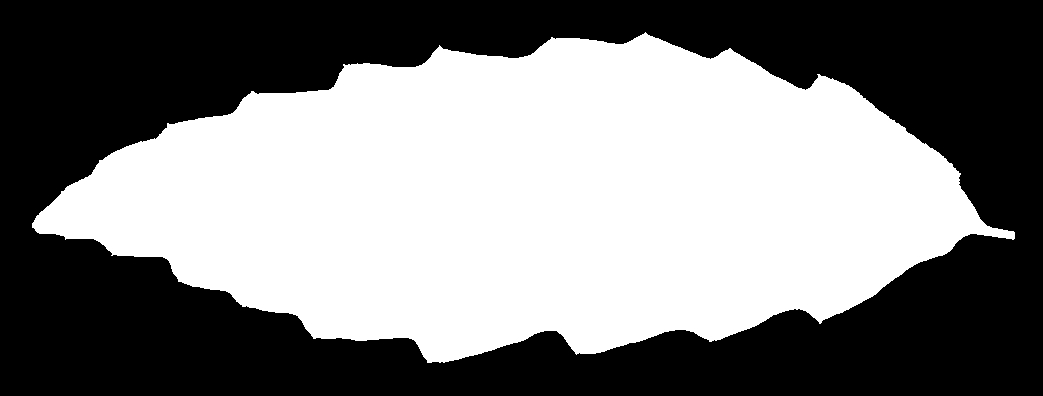

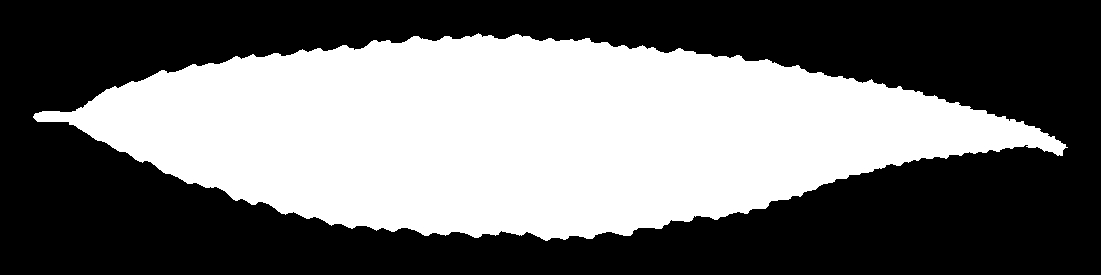

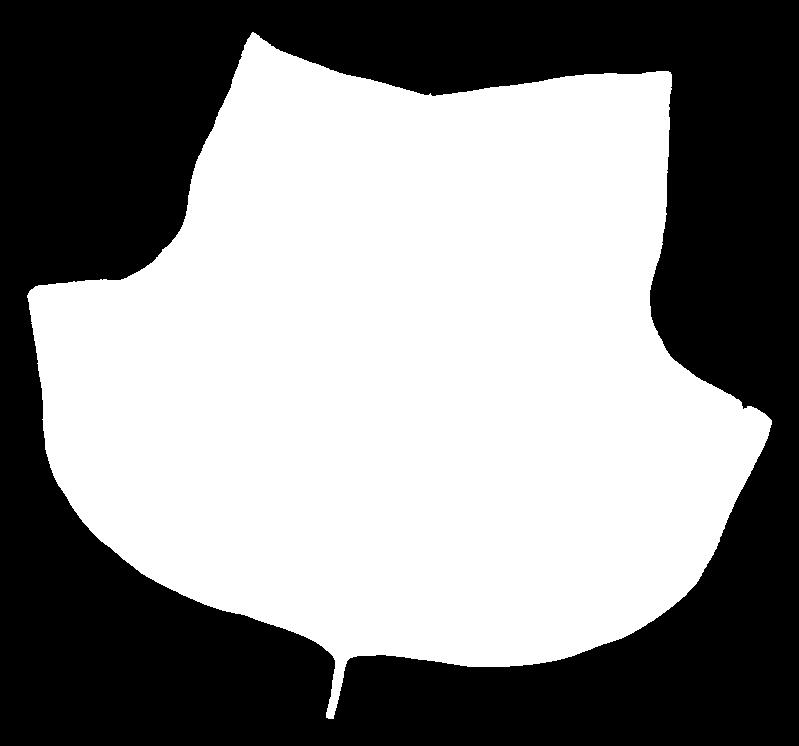

In [16]:
# from IPython.display import Image
# Image('864.jpg')
# from IPython.display import Image, display
# for _ in range(20):
#   display(Image(str(random.randrange(0, 200, 5))+".jpg", width=200, height=200))

import random
from google.colab.patches import cv2_imshow
from skimage import io
for _ in range(5):
  img_path = str(random.randrange(0, 200, 5))+".jpg"
  image = io.imread(img_path)
  cv2_imshow(image)

In [360]:
df = pd.read_csv("train.csv")

print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
df.head()

Data has 990 Rows and 194 Features


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [361]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [362]:
print(f"Data has {df.duplicated().sum()} dublicates")


Data has 0 dublicates


In [363]:
df.isnull().sum().any()

False

In [364]:
print(f"'species' Coloumn has {len(df['species'].unique())} unique values")
print(df['species'].unique())

'species' Coloumn has 99 unique values
['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta

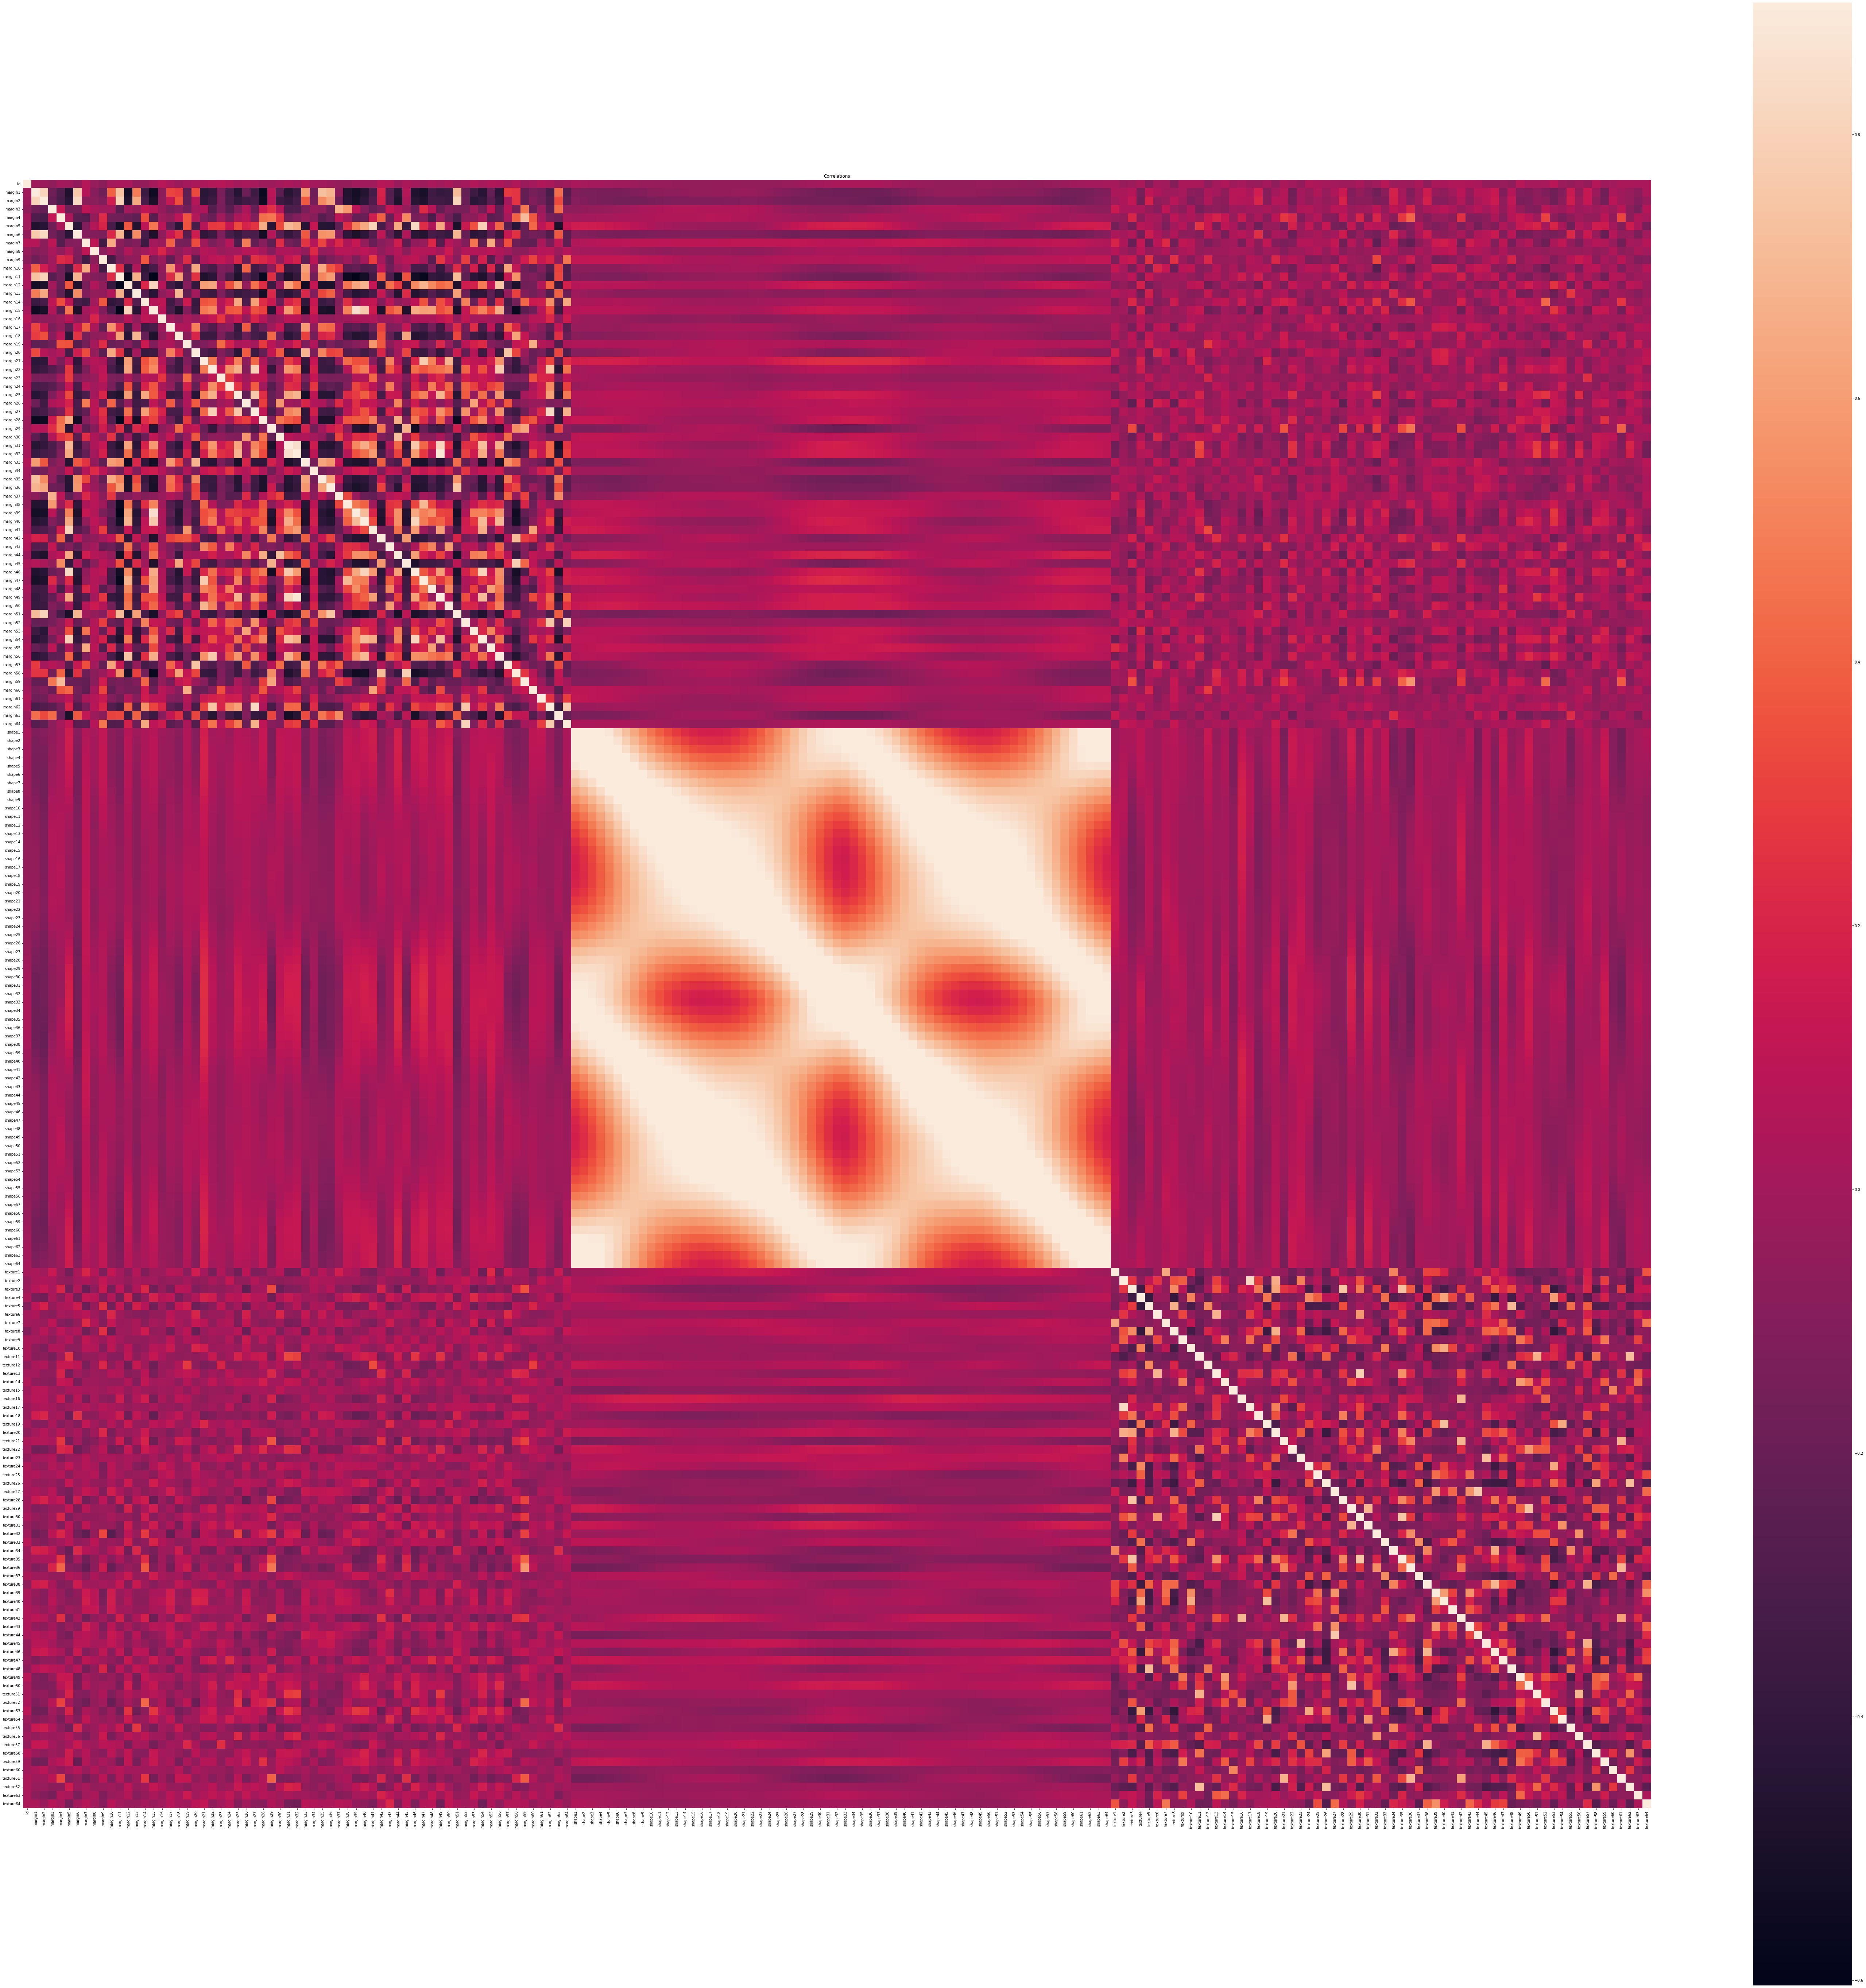

In [397]:
#heatmap correlation
plt.figure(figsize = (100,100))
sns.heatmap(df.corr(), vmax = 0.9, square = True, annot = False)
plt.title("Correlations")
plt.show()

In [406]:
df.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

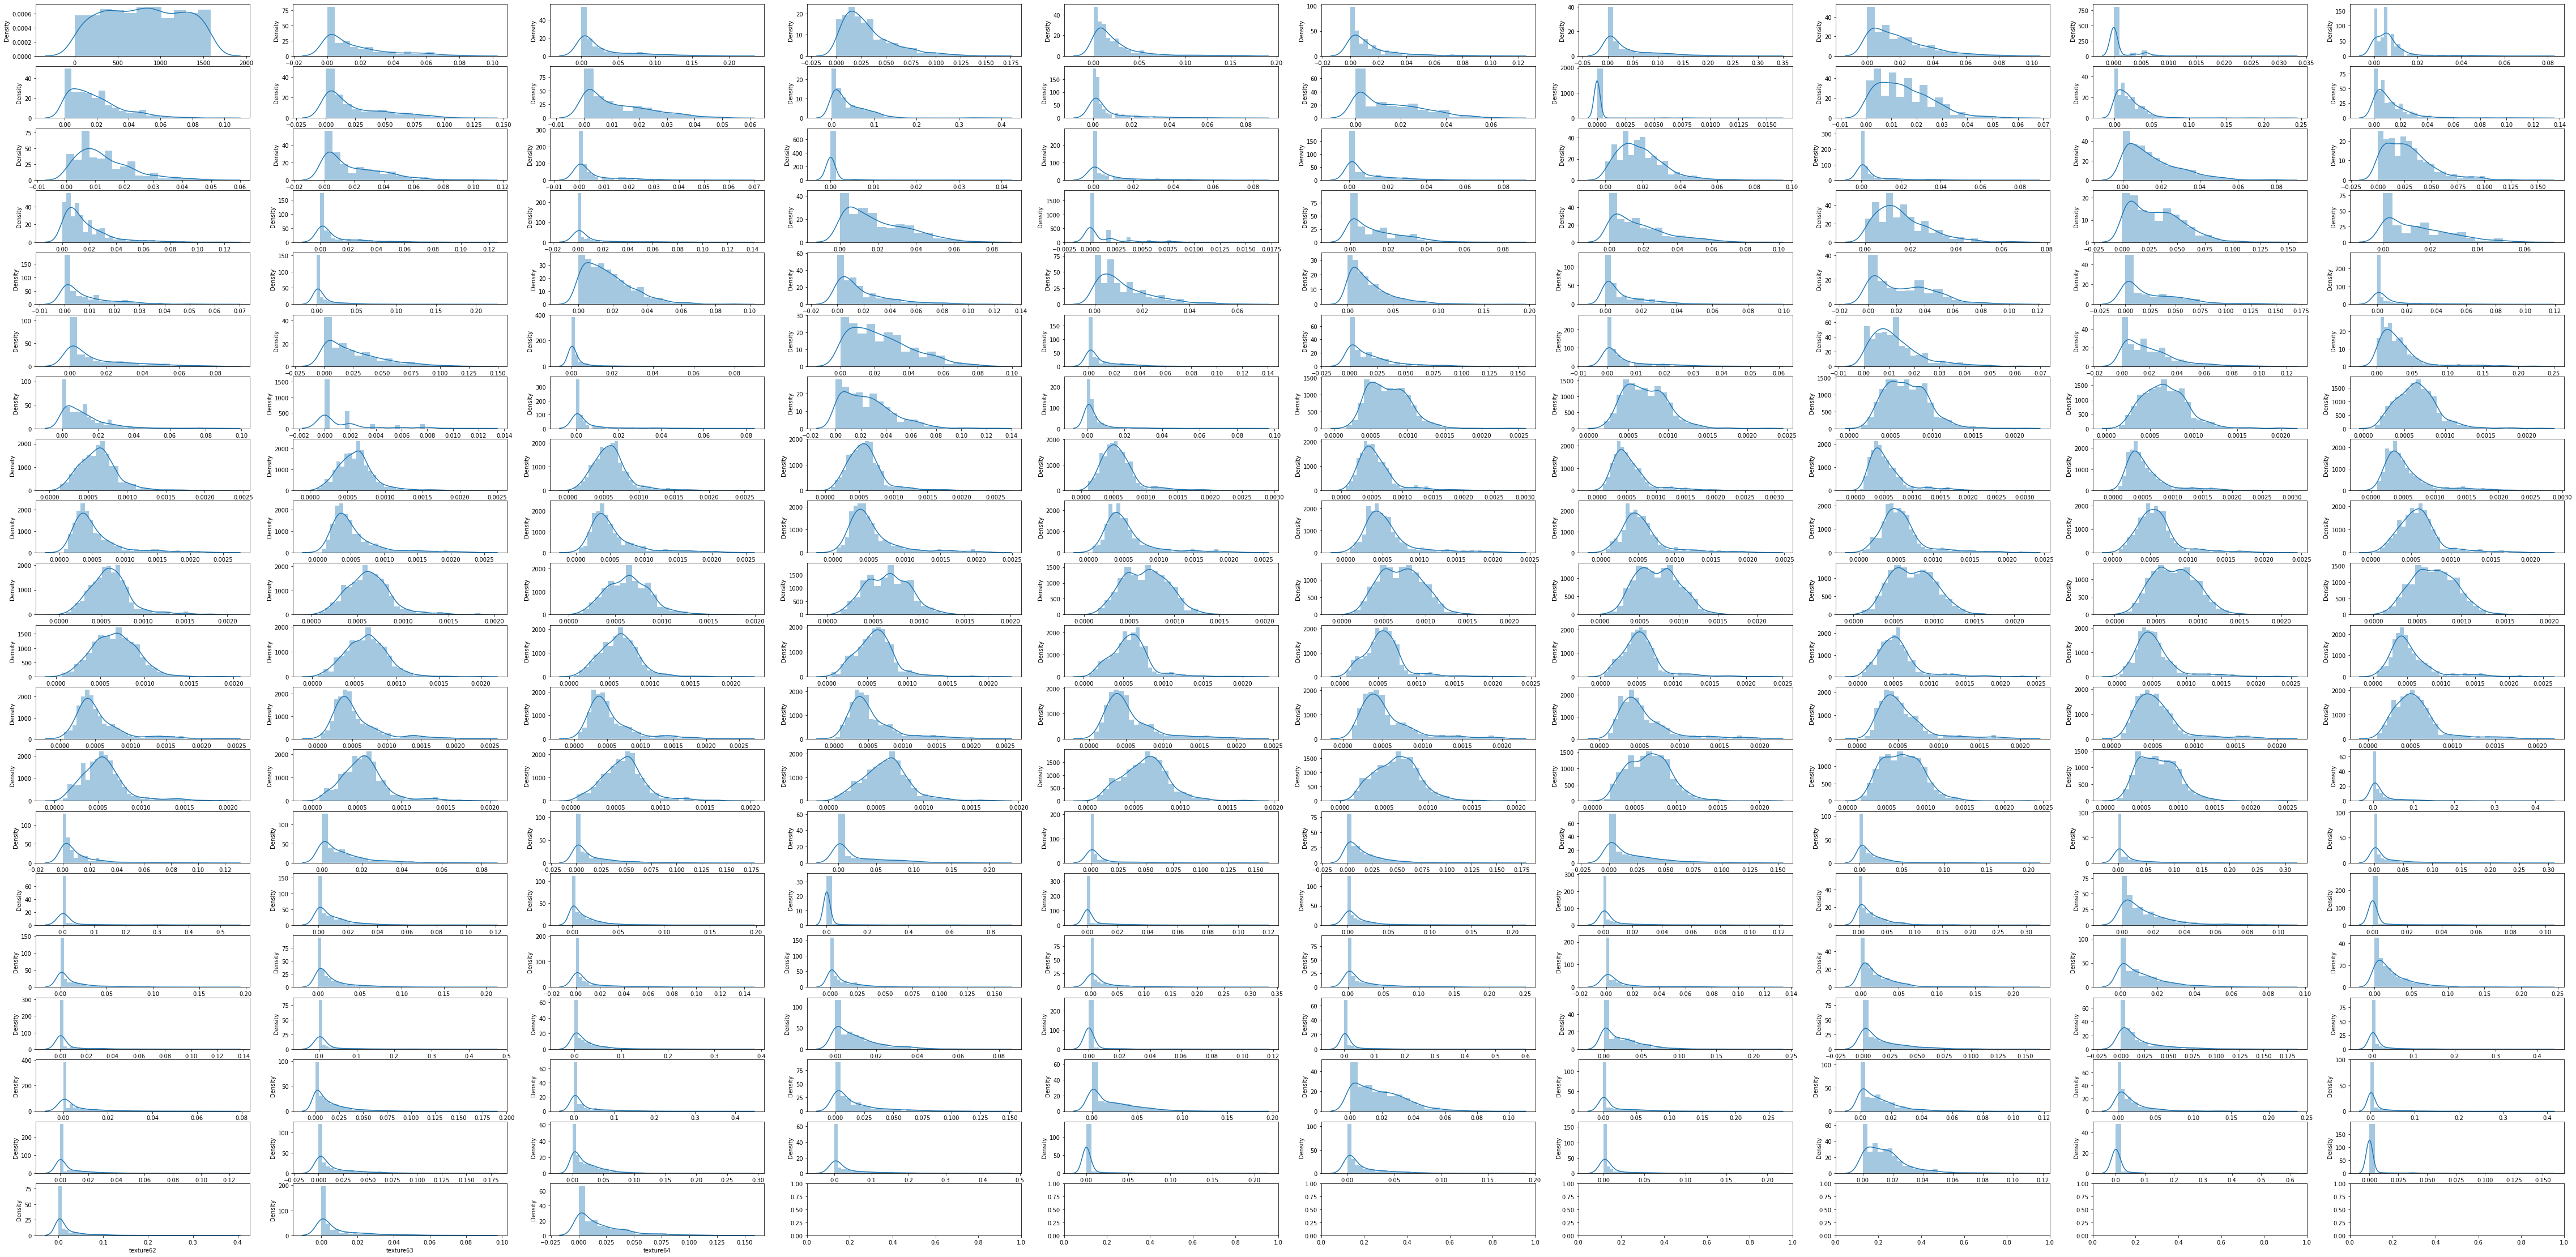

In [414]:
fig,ax = plt.subplots(ncols = 10, nrows = 20,figsize = (80,40))
ax = ax.flatten()
index = 0
for col in df.columns:
  if col == 'species':continue
  sns.distplot(df[col], ax = ax[index])
  index+=1

In [365]:
X = df.drop(['id', 'species'], axis =1).values
y = df['species'].values

In [366]:
y = LabelEncoder().fit_transform(y)

In [367]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [368]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Modeling**

In [369]:
def create_model( nl1=1, nl2=0,  nl3=0, 
                 nn1=768, nn2=500, nn3 = 200, lr=0.01, decay=0.001, l1=0.01, l2=0.01,
                act = 'tanh', dropout=0.3, input_shape=192, output_shape=99):
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
                                                     
    model = Sequential()
    
    # for the firt layer we need to specify the input dimensions
    first=True
    
    for i in range(nl1):
        if first:
            model.add(Dense(nn1, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn1, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl2):
        if first:
            model.add(Dense(nn2, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn2, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    for i in range(nl3):
        if first:
            model.add(Dense(nn3, input_dim=input_shape, activation=act, kernel_regularizer=reg))
            first=False
        else: 
            model.add(Dense(nn3, activation=act, kernel_regularizer=reg))
        if dropout!=0:
            model.add(Dropout(dropout))
            
    model.add(Dense(output_shape, activation='softmax'))
    model.compile(loss='SparseCategoricalCrossentropy', optimizer=opt, metrics=['accuracy'],)
    return model

<ipython-input-369-94a3e929a6c2>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=1)


In [ ]:
# model class to use in the scikit random search CV 
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=1)


batch_size = [16, 32, 64]
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4]
decay=[1e-6,1e-9,0]



# numbers of layers
nl1 = [1]
nl2 = [0]
nl3 = [0]

# neurons in each layer
nn1=[192, 384, 768]
nn2=[0]
nn3=[0]

# dropout and regularisation
dropout = [0, 0.1, 0.2, 0.3]
l1 = [0, 0.01, 0.003, 0.001,0.0001]
l2 = [0, 0.01, 0.003, 0.001,0.0001]

# dictionary summary
param_grid = dict(batch_size=batch_size,
                  nl1=nl1, nl2=nl2, nl3=nl3, nn1=nn1, nn2=nn2, nn3=nn3,
                  l1=l1, l2=l2, lr=lr, decay=decay, dropout=dropout, 
                  input_shape=[192], output_shape = [99],
                 )
grid = RandomizedSearchCV(estimator=model, cv=KFold(3), param_distributions=param_grid, 
                          verbose=20,  n_iter=10, n_jobs=1)

early_stopping = EarlyStopping(monitor='accuracy', patience=30)

In [370]:
grid_result = grid.fit(X_train, y_train, validation_data = (X_test, y_test), callbacks=[early_stopping])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START batch_size=32, decay=1e-06, dropout=0, input_shape=192, l1=0.01, l2=0.003, lr=0.001, nl1=1, nl2=0, nl3=0, nn1=192, nn2=0, nn3=0, output_shape=99
Epoch 1/1000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 18ms/step - loss: 25.9018 - accuracy: 0.0606 - val_loss: 23.0816 - val_accuracy: 0.1616
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 20.8205 - accuracy: 0.4053 - val_loss: 18.6850 - val_accuracy: 0.4141
Epoch 3/1000
17/17 [==============================] - 0s 7ms/step - loss: 16.6264 - accuracy: 0.6742 - val_loss: 15.0194 - val_accuracy: 0.5758
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 13.1470 - accuracy: 0.8087 - val_loss: 11.9343 - val_accuracy: 0.6364
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 10.2855 - accuracy: 0.8655 - val_loss: 9.4106 - val_accuracy: 0.6869
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 7.9989 - accuracy: 0.9053 - val_loss: 7.4319 - val_accuracy: 0.7424
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 6.2659 - accuracy: 0.9053 - val_loss: 5.9817 - val_accuracy: 0.7374
Epoch 8/1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 16ms/step - loss: 26.0046 - accuracy: 0.0625 - val_loss: 23.1700 - val_accuracy: 0.1515
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 20.9612 - accuracy: 0.3636 - val_loss: 18.8460 - val_accuracy: 0.3788
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 16.8011 - accuracy: 0.6875 - val_loss: 15.1682 - val_accuracy: 0.5505
Epoch 4/1000
17/17 [==============================] - 0s 5ms/step - loss: 13.3159 - accuracy: 0.8030 - val_loss: 12.1120 - val_accuracy: 0.6263
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 10.4395 - accuracy: 0.8542 - val_loss: 9.5758 - val_accuracy: 0.6768
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 8.1443 - accuracy: 0.8712 - val_loss: 7.5964 - val_accuracy: 0.6919
Epoch 7/1000
17/17 [==============================] - 0s 5ms/step - loss: 6.3817 - accuracy: 0.8845 - val_loss: 6.1165 - val_accuracy: 0.6768
Epoch 8/1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 17ms/step - loss: 25.9784 - accuracy: 0.0701 - val_loss: 23.1302 - val_accuracy: 0.2222
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 20.9392 - accuracy: 0.4337 - val_loss: 18.7716 - val_accuracy: 0.4646
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 16.7598 - accuracy: 0.6610 - val_loss: 15.0754 - val_accuracy: 0.5758
Epoch 4/1000
17/17 [==============================] - 0s 7ms/step - loss: 13.2487 - accuracy: 0.7784 - val_loss: 11.9751 - val_accuracy: 0.6414
Epoch 5/1000
17/17 [==============================] - 0s 5ms/step - loss: 10.3648 - accuracy: 0.8523 - val_loss: 9.4368 - val_accuracy: 0.6970
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 8.0570 - accuracy: 0.8845 - val_loss: 7.4268 - val_accuracy: 0.7172
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 6.3012 - accuracy: 0.9167 - val_loss: 5.9407 - val_accuracy: 0.7222
Epoch 8/1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 22ms/step - loss: 10.7019 - accuracy: 0.0170 - val_loss: 10.4050 - val_accuracy: 0.0354
Epoch 2/1000
17/17 [==============================] - 0s 10ms/step - loss: 10.1724 - accuracy: 0.1023 - val_loss: 10.0098 - val_accuracy: 0.1111
Epoch 3/1000
17/17 [==============================] - 0s 12ms/step - loss: 9.7061 - accuracy: 0.2235 - val_loss: 9.6542 - val_accuracy: 0.1970
Epoch 4/1000
17/17 [==============================] - 0s 9ms/step - loss: 9.3044 - accuracy: 0.3693 - val_loss: 9.3299 - val_accuracy: 0.3333
Epoch 5/1000
17/17 [==============================] - 0s 10ms/step - loss: 8.9116 - accuracy: 0.5000 - val_loss: 9.0402 - val_accuracy: 0.4293
Epoch 6/1000
17/17 [==============================] - 0s 10ms/step - loss: 8.5537 - accuracy: 0.6080 - val_loss: 8.7663 - val_accuracy: 0.4949
Epoch 7/1000
17/17 [==============================] - 0s 10ms/step - loss: 8.2692 - accuracy: 0.6629 - val_loss: 8.5217 - val_accuracy: 0.5253
Epoch 8/1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 22ms/step - loss: 10.8612 - accuracy: 0.0284 - val_loss: 10.5781 - val_accuracy: 0.0455
Epoch 2/1000
17/17 [==============================] - 0s 9ms/step - loss: 10.2979 - accuracy: 0.1042 - val_loss: 10.1744 - val_accuracy: 0.1061
Epoch 3/1000
17/17 [==============================] - 0s 12ms/step - loss: 9.8123 - accuracy: 0.1894 - val_loss: 9.8129 - val_accuracy: 0.1818
Epoch 4/1000
17/17 [==============================] - 0s 10ms/step - loss: 9.4047 - accuracy: 0.3144 - val_loss: 9.4825 - val_accuracy: 0.2626
Epoch 5/1000
17/17 [==============================] - 0s 9ms/step - loss: 9.0040 - accuracy: 0.4583 - val_loss: 9.1908 - val_accuracy: 0.3788
Epoch 6/1000
17/17 [==============================] - 0s 10ms/step - loss: 8.6680 - accuracy: 0.5549 - val_loss: 8.9079 - val_accuracy: 0.4545
Epoch 7/1000
17/17 [==============================] - 0s 10ms/step - loss: 8.3304 - accuracy: 0.6686 - val_loss: 8.6578 - val_accuracy: 0.5253
Epoch 8/10

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 47ms/step - loss: 10.7776 - accuracy: 0.0170 - val_loss: 10.4942 - val_accuracy: 0.0606
Epoch 2/1000
17/17 [==============================] - 0s 9ms/step - loss: 10.2028 - accuracy: 0.0852 - val_loss: 10.0746 - val_accuracy: 0.1212
Epoch 3/1000
17/17 [==============================] - 0s 9ms/step - loss: 9.7278 - accuracy: 0.2083 - val_loss: 9.7065 - val_accuracy: 0.2172
Epoch 4/1000
17/17 [==============================] - 0s 9ms/step - loss: 9.2811 - accuracy: 0.3693 - val_loss: 9.3678 - val_accuracy: 0.3030
Epoch 5/1000
17/17 [==============================] - 0s 13ms/step - loss: 8.8866 - accuracy: 0.5057 - val_loss: 9.0721 - val_accuracy: 0.4040
Epoch 6/1000
17/17 [==============================] - 0s 9ms/step - loss: 8.5412 - accuracy: 0.5795 - val_loss: 8.7952 - val_accuracy: 0.4899
Epoch 7/1000
17/17 [==============================] - 0s 12ms/step - loss: 8.2397 - accuracy: 0.6875 - val_loss: 8.5489 - val_accuracy: 0.5303
Epoch 8/1000

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 30ms/step - loss: 11.4251 - accuracy: 0.0530 - val_loss: 10.6690 - val_accuracy: 0.1566
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.0892 - accuracy: 0.3049 - val_loss: 9.7306 - val_accuracy: 0.3485
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 9.0567 - accuracy: 0.5852 - val_loss: 8.9334 - val_accuracy: 0.5000
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 8.2113 - accuracy: 0.7386 - val_loss: 8.2338 - val_accuracy: 0.6010
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.5080 - accuracy: 0.8409 - val_loss: 7.6133 - val_accuracy: 0.7172
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.9090 - accuracy: 0.8731 - val_loss: 7.0718 - val_accuracy: 0.7374
Epoch 7/1000
9/9 [==============================] - 0s 11ms/step - loss: 6.3557 - accuracy: 0.9053 - val_loss: 6.5701 - val_accuracy: 0.7828
Epoch 8/1000
9/9 [=======

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 31ms/step - loss: 11.4740 - accuracy: 0.0587 - val_loss: 10.8207 - val_accuracy: 0.0707
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 10.1476 - accuracy: 0.2765 - val_loss: 9.9003 - val_accuracy: 0.2576
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.1160 - accuracy: 0.5417 - val_loss: 9.1151 - val_accuracy: 0.4242
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.2900 - accuracy: 0.7273 - val_loss: 8.4399 - val_accuracy: 0.5253
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5894 - accuracy: 0.8125 - val_loss: 7.8386 - val_accuracy: 0.6111
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.9698 - accuracy: 0.8523 - val_loss: 7.2946 - val_accuracy: 0.6616
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 6.4111 - accuracy: 0.9034 - val_loss: 6.7830 - val_accuracy: 0.7273
Epoch 8/1000
9/9 [==========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 28ms/step - loss: 11.5848 - accuracy: 0.0246 - val_loss: 10.8090 - val_accuracy: 0.1465
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.1945 - accuracy: 0.2614 - val_loss: 9.8622 - val_accuracy: 0.2677
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.1577 - accuracy: 0.5303 - val_loss: 9.0780 - val_accuracy: 0.4495
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.2875 - accuracy: 0.7102 - val_loss: 8.3594 - val_accuracy: 0.6313
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.5580 - accuracy: 0.8523 - val_loss: 7.7301 - val_accuracy: 0.7374
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.9431 - accuracy: 0.9072 - val_loss: 7.1717 - val_accuracy: 0.7677
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.4028 - accuracy: 0.9451 - val_loss: 6.6627 - val_accuracy: 0.7828
Epoch 8/1000
9/9 [========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 19ms/step - loss: 3.8596 - accuracy: 0.5019 - val_loss: 2.7980 - val_accuracy: 0.6869
Epoch 2/1000
17/17 [==============================] - 0s 9ms/step - loss: 2.1055 - accuracy: 0.8428 - val_loss: 2.5238 - val_accuracy: 0.7929
Epoch 3/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.6867 - accuracy: 0.9167 - val_loss: 1.5195 - val_accuracy: 0.8535
Epoch 4/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.2500 - accuracy: 0.9337 - val_loss: 1.2597 - val_accuracy: 0.8889
Epoch 5/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1389 - accuracy: 0.9318 - val_loss: 1.1700 - val_accuracy: 0.8788
Epoch 6/1000
17/17 [==============================] - 0s 9ms/step - loss: 0.8900 - accuracy: 0.9394 - val_loss: 1.5423 - val_accuracy: 0.8636
Epoch 7/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1666 - accuracy: 0.9110 - val_loss: 1.5317 - val_accuracy: 0.7980
Epoch 8/1000
17/17

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 19ms/step - loss: 4.1322 - accuracy: 0.4640 - val_loss: 3.6551 - val_accuracy: 0.6414
Epoch 2/1000
17/17 [==============================] - 0s 9ms/step - loss: 2.5151 - accuracy: 0.8106 - val_loss: 2.1124 - val_accuracy: 0.8182
Epoch 3/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.8573 - accuracy: 0.8939 - val_loss: 1.8207 - val_accuracy: 0.8535
Epoch 4/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.5454 - accuracy: 0.9053 - val_loss: 1.6595 - val_accuracy: 0.8030
Epoch 5/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.3714 - accuracy: 0.9110 - val_loss: 1.5238 - val_accuracy: 0.8283
Epoch 6/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.1260 - accuracy: 0.9356 - val_loss: 1.7228 - val_accuracy: 0.7980
Epoch 7/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.2034 - accuracy: 0.9034 - val_loss: 1.7360 - val_accuracy: 0.8030
Epoch 8/1000
17

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 23ms/step - loss: 4.1106 - accuracy: 0.5038 - val_loss: 3.2905 - val_accuracy: 0.7071
Epoch 2/1000
17/17 [==============================] - 0s 9ms/step - loss: 2.2173 - accuracy: 0.8371 - val_loss: 2.3574 - val_accuracy: 0.8030
Epoch 3/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.7506 - accuracy: 0.8977 - val_loss: 1.7521 - val_accuracy: 0.8636
Epoch 4/1000
17/17 [==============================] - 0s 10ms/step - loss: 1.3467 - accuracy: 0.9356 - val_loss: 1.5679 - val_accuracy: 0.8535
Epoch 5/1000
17/17 [==============================] - 0s 9ms/step - loss: 1.1250 - accuracy: 0.9394 - val_loss: 2.1125 - val_accuracy: 0.7677
Epoch 6/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.3347 - accuracy: 0.8883 - val_loss: 1.9902 - val_accuracy: 0.7929
Epoch 7/1000
17/17 [==============================] - 0s 8ms/step - loss: 1.4525 - accuracy: 0.8674 - val_loss: 1.9923 - val_accuracy: 0.8182
Epoch 8/1000
17/1

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 26ms/step - loss: 27.7600 - accuracy: 0.0057 - val_loss: 27.6462 - val_accuracy: 0.0152
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.4285 - accuracy: 0.0095 - val_loss: 27.3441 - val_accuracy: 0.0152
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.1056 - accuracy: 0.0227 - val_loss: 27.0460 - val_accuracy: 0.0202
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 26.7752 - accuracy: 0.0152 - val_loss: 26.7529 - val_accuracy: 0.0202
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 26.4716 - accuracy: 0.0246 - val_loss: 26.4610 - val_accuracy: 0.0253
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 26.1888 - accuracy: 0.0303 - val_loss: 26.1722 - val_accuracy: 0.0354
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 25.9003 - accuracy: 0.0436 - val_loss: 25.8873 - val_accuracy: 0.0354
Epoch 8/1000
9/9 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 29ms/step - loss: 27.6986 - accuracy: 0.0284 - val_loss: 27.4776 - val_accuracy: 0.0303
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.3699 - accuracy: 0.0246 - val_loss: 27.1786 - val_accuracy: 0.0303
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.0686 - accuracy: 0.0303 - val_loss: 26.8858 - val_accuracy: 0.0404
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 26.7591 - accuracy: 0.0360 - val_loss: 26.5965 - val_accuracy: 0.0606
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 26.4877 - accuracy: 0.0360 - val_loss: 26.3102 - val_accuracy: 0.0606
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 26.1908 - accuracy: 0.0360 - val_loss: 26.0274 - val_accuracy: 0.0606
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 25.8735 - accuracy: 0.0530 - val_loss: 25.7478 - val_accuracy: 0.0808
Epoch 8/1000
9/9 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 30ms/step - loss: 27.7809 - accuracy: 0.0114 - val_loss: 27.5059 - val_accuracy: 0.0051
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.4723 - accuracy: 0.0152 - val_loss: 27.2080 - val_accuracy: 0.0101
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.1549 - accuracy: 0.0114 - val_loss: 26.9140 - val_accuracy: 0.0202
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 26.8347 - accuracy: 0.0265 - val_loss: 26.6245 - val_accuracy: 0.0303
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 26.5501 - accuracy: 0.0436 - val_loss: 26.3383 - val_accuracy: 0.0303
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 26.2923 - accuracy: 0.0360 - val_loss: 26.0537 - val_accuracy: 0.0303
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 25.9585 - accuracy: 0.0341 - val_loss: 25.7718 - val_accuracy: 0.0303
Epoch 8/1000
9/9 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 11ms/step - loss: 3.1560 - accuracy: 0.4640 - val_loss: 2.0781 - val_accuracy: 0.6818
Epoch 2/1000
33/33 [==============================] - 0s 8ms/step - loss: 1.1633 - accuracy: 0.8068 - val_loss: 0.5500 - val_accuracy: 0.8737
Epoch 3/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.8788 - val_loss: 1.0697 - val_accuracy: 0.8333
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.8232 - accuracy: 0.8712 - val_loss: 0.6256 - val_accuracy: 0.8485
Epoch 5/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.6442 - accuracy: 0.8920 - val_loss: 1.2639 - val_accuracy: 0.7677
Epoch 6/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.5368 - accuracy: 0.8883 - val_loss: 1.1744 - val_accuracy: 0.8030
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.6514 - accuracy: 0.9015 - val_loss: 1.3423 - val_accuracy: 0.8081
Epoch 8/1000
33/33

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 12ms/step - loss: 3.3386 - accuracy: 0.4072 - val_loss: 1.9172 - val_accuracy: 0.6869
Epoch 2/1000
33/33 [==============================] - 0s 6ms/step - loss: 1.2161 - accuracy: 0.7841 - val_loss: 1.1207 - val_accuracy: 0.7626
Epoch 3/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.5876 - accuracy: 0.8788 - val_loss: 1.4743 - val_accuracy: 0.7525
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.6574 - accuracy: 0.8750 - val_loss: 0.6152 - val_accuracy: 0.8737
Epoch 5/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.5126 - accuracy: 0.9091 - val_loss: 1.4695 - val_accuracy: 0.8131
Epoch 6/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.9082 - accuracy: 0.8617 - val_loss: 1.4644 - val_accuracy: 0.7778
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.8053 - accuracy: 0.8693 - val_loss: 1.2469 - val_accuracy: 0.8030
Epoch 8/1000
33/33

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 12ms/step - loss: 3.8128 - accuracy: 0.3902 - val_loss: 1.5642 - val_accuracy: 0.7071
Epoch 2/1000
33/33 [==============================] - 0s 8ms/step - loss: 1.1282 - accuracy: 0.7746 - val_loss: 0.9775 - val_accuracy: 0.8131
Epoch 3/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.7837 - accuracy: 0.8580 - val_loss: 0.7350 - val_accuracy: 0.8485
Epoch 4/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.3904 - accuracy: 0.9223 - val_loss: 0.6776 - val_accuracy: 0.8586
Epoch 5/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.9413 - val_loss: 0.7666 - val_accuracy: 0.8535
Epoch 6/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.3783 - accuracy: 0.9470 - val_loss: 1.4523 - val_accuracy: 0.7828
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.3620 - accuracy: 0.9451 - val_loss: 1.0072 - val_accuracy: 0.8586
Epoch 8/1000
33/33

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 9ms/step - loss: 5.0616 - accuracy: 0.0170 - val_loss: 4.8658 - val_accuracy: 0.0152
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.8389 - accuracy: 0.0246 - val_loss: 4.6784 - val_accuracy: 0.0202
Epoch 3/1000
33/33 [==============================] - 0s 5ms/step - loss: 4.5952 - accuracy: 0.0455 - val_loss: 4.5018 - val_accuracy: 0.0556
Epoch 4/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.4083 - accuracy: 0.0568 - val_loss: 4.3342 - val_accuracy: 0.1010
Epoch 5/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.2035 - accuracy: 0.1023 - val_loss: 4.1737 - val_accuracy: 0.1414
Epoch 6/1000
33/33 [==============================] - 0s 4ms/step - loss: 3.9828 - accuracy: 0.1591 - val_loss: 4.0258 - val_accuracy: 0.1869
Epoch 7/1000
33/33 [==============================] - 0s 5ms/step - loss: 3.8028 - accuracy: 0.2140 - val_loss: 3.8814 - val_accuracy: 0.2172
Epoch 8/1000
33/33 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 9ms/step - loss: 4.9866 - accuracy: 0.0170 - val_loss: 4.7945 - val_accuracy: 0.0000e+00
Epoch 2/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.7382 - accuracy: 0.0133 - val_loss: 4.6153 - val_accuracy: 0.0152
Epoch 3/1000
33/33 [==============================] - 0s 5ms/step - loss: 4.4950 - accuracy: 0.0492 - val_loss: 4.4423 - val_accuracy: 0.0455
Epoch 4/1000
33/33 [==============================] - 0s 5ms/step - loss: 4.2948 - accuracy: 0.0871 - val_loss: 4.2838 - val_accuracy: 0.0657
Epoch 5/1000
33/33 [==============================] - 0s 6ms/step - loss: 4.0582 - accuracy: 0.1155 - val_loss: 4.1276 - val_accuracy: 0.1263
Epoch 6/1000
33/33 [==============================] - 0s 4ms/step - loss: 3.9284 - accuracy: 0.1723 - val_loss: 3.9800 - val_accuracy: 0.2323
Epoch 7/1000
33/33 [==============================] - 0s 4ms/step - loss: 3.6739 - accuracy: 0.2670 - val_loss: 3.8435 - val_accuracy: 0.2828
Epoch 8/1000
33

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


33/33 [==============================] - 1s 10ms/step - loss: 5.1474 - accuracy: 0.0170 - val_loss: 4.8486 - val_accuracy: 0.0101
Epoch 2/1000
33/33 [==============================] - 0s 5ms/step - loss: 4.9037 - accuracy: 0.0227 - val_loss: 4.6511 - val_accuracy: 0.0202
Epoch 3/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.6662 - accuracy: 0.0284 - val_loss: 4.4696 - val_accuracy: 0.0404
Epoch 4/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.4116 - accuracy: 0.0473 - val_loss: 4.2954 - val_accuracy: 0.0707
Epoch 5/1000
33/33 [==============================] - 0s 4ms/step - loss: 4.1728 - accuracy: 0.0966 - val_loss: 4.1361 - val_accuracy: 0.1010
Epoch 6/1000
33/33 [==============================] - 0s 5ms/step - loss: 4.0199 - accuracy: 0.1345 - val_loss: 3.9777 - val_accuracy: 0.1465
Epoch 7/1000
33/33 [==============================] - 0s 5ms/step - loss: 3.8095 - accuracy: 0.1818 - val_loss: 3.8337 - val_accuracy: 0.2020
Epoch 8/1000
33/33

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 15ms/step - loss: 3.1924 - accuracy: 0.3333 - val_loss: 1.4517 - val_accuracy: 0.7121
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.8882 - accuracy: 0.8617 - val_loss: 0.7196 - val_accuracy: 0.9091
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.4879 - accuracy: 0.9678 - val_loss: 0.5502 - val_accuracy: 0.9596
Epoch 4/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.9830 - val_loss: 0.4507 - val_accuracy: 0.9747
Epoch 5/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.3213 - accuracy: 0.9962 - val_loss: 0.3920 - val_accuracy: 0.9798
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.2732 - accuracy: 1.0000 - val_loss: 0.3510 - val_accuracy: 0.9747
Epoch 7/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.2318 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 0.9848
Epoch 8/1000
17/17

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 17ms/step - loss: 3.1999 - accuracy: 0.3750 - val_loss: 1.8137 - val_accuracy: 0.5657
Epoch 2/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.9186 - accuracy: 0.8466 - val_loss: 0.7734 - val_accuracy: 0.9141
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.5048 - accuracy: 0.9640 - val_loss: 0.6478 - val_accuracy: 0.9141
Epoch 4/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.3854 - accuracy: 0.9905 - val_loss: 0.5603 - val_accuracy: 0.9343
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.3395 - accuracy: 0.9943 - val_loss: 0.5416 - val_accuracy: 0.9192
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.9905 - val_loss: 0.3977 - val_accuracy: 0.9747
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.2414 - accuracy: 0.9981 - val_loss: 0.3587 - val_accuracy: 0.9747
Epoch 8/1000
17/17

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


17/17 [==============================] - 1s 15ms/step - loss: 3.2929 - accuracy: 0.3182 - val_loss: 1.7174 - val_accuracy: 0.6869
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.9422 - accuracy: 0.8333 - val_loss: 0.7804 - val_accuracy: 0.8990
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.4766 - accuracy: 0.9792 - val_loss: 0.5452 - val_accuracy: 0.9495
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.3704 - accuracy: 0.9924 - val_loss: 0.5121 - val_accuracy: 0.9444
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 0.3284 - accuracy: 0.9905 - val_loss: 0.4697 - val_accuracy: 0.9444
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 0.9962 - val_loss: 0.4421 - val_accuracy: 0.9495
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.2433 - accuracy: 0.9943 - val_loss: 0.3532 - val_accuracy: 0.9646
Epoch 8/1000
17/17

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 27ms/step - loss: 18.9982 - accuracy: 0.2860 - val_loss: 9.7405 - val_accuracy: 0.6212
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.5606 - accuracy: 0.7045 - val_loss: 6.6322 - val_accuracy: 0.6566
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7158 - accuracy: 0.7803 - val_loss: 5.0365 - val_accuracy: 0.7980
Epoch 4/1000
9/9 [==============================] - 0s 11ms/step - loss: 4.4692 - accuracy: 0.8428 - val_loss: 4.2923 - val_accuracy: 0.8182
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 3.8532 - accuracy: 0.8883 - val_loss: 3.6896 - val_accuracy: 0.8586
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.2711 - accuracy: 0.9337 - val_loss: 3.2953 - val_accuracy: 0.8636
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 2.9627 - accuracy: 0.9564 - val_loss: 3.0560 - val_accuracy: 0.8586
Epoch 8/1000
9/9 [==========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 31ms/step - loss: 18.8705 - accuracy: 0.2614 - val_loss: 9.8020 - val_accuracy: 0.5556
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5861 - accuracy: 0.6761 - val_loss: 6.7481 - val_accuracy: 0.6111
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 5.8380 - accuracy: 0.7386 - val_loss: 5.1726 - val_accuracy: 0.6768
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 4.5241 - accuracy: 0.8182 - val_loss: 4.3863 - val_accuracy: 0.6919
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.8545 - accuracy: 0.8580 - val_loss: 3.8421 - val_accuracy: 0.7525
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 3.3858 - accuracy: 0.8902 - val_loss: 3.3844 - val_accuracy: 0.8384
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.0432 - accuracy: 0.9413 - val_loss: 3.1681 - val_accuracy: 0.8283
Epoch 8/1000
9/9 [===========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 29ms/step - loss: 19.0493 - accuracy: 0.2708 - val_loss: 9.7712 - val_accuracy: 0.6061
Epoch 2/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5870 - accuracy: 0.7064 - val_loss: 6.6066 - val_accuracy: 0.7273
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 5.7168 - accuracy: 0.8068 - val_loss: 5.1027 - val_accuracy: 0.7172
Epoch 4/1000
9/9 [==============================] - 0s 11ms/step - loss: 4.5121 - accuracy: 0.8182 - val_loss: 4.3142 - val_accuracy: 0.7828
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.8345 - accuracy: 0.8428 - val_loss: 3.8211 - val_accuracy: 0.8030
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 3.4107 - accuracy: 0.9091 - val_loss: 3.4051 - val_accuracy: 0.8838
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.0506 - accuracy: 0.9299 - val_loss: 3.1688 - val_accuracy: 0.8636
Epoch 8/1000
9/9 [==========

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 27ms/step - loss: 4.8452 - accuracy: 0.0246 - val_loss: 4.2546 - val_accuracy: 0.1162
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.7426 - accuracy: 0.2576 - val_loss: 3.5562 - val_accuracy: 0.3384
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.9670 - accuracy: 0.5398 - val_loss: 3.0218 - val_accuracy: 0.4848
Epoch 4/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.3518 - accuracy: 0.7386 - val_loss: 2.5896 - val_accuracy: 0.5909
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.9194 - accuracy: 0.8106 - val_loss: 2.2533 - val_accuracy: 0.6717
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.5652 - accuracy: 0.8769 - val_loss: 1.9467 - val_accuracy: 0.7374
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.3077 - accuracy: 0.9280 - val_loss: 1.6758 - val_accuracy: 0.8434
Epoch 8/1000
9/9 [=============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 26ms/step - loss: 4.7639 - accuracy: 0.0322 - val_loss: 4.2102 - val_accuracy: 0.1010
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.7177 - accuracy: 0.2633 - val_loss: 3.5466 - val_accuracy: 0.3384
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 2.9481 - accuracy: 0.5208 - val_loss: 3.0607 - val_accuracy: 0.4495
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 2.4046 - accuracy: 0.7064 - val_loss: 2.6577 - val_accuracy: 0.5909
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.9422 - accuracy: 0.8049 - val_loss: 2.3293 - val_accuracy: 0.6515
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.6563 - accuracy: 0.8617 - val_loss: 2.0543 - val_accuracy: 0.6818
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.3691 - accuracy: 0.9015 - val_loss: 1.8331 - val_accuracy: 0.7121
Epoch 8/1000
9/9 [==============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 1s 29ms/step - loss: 4.8762 - accuracy: 0.0360 - val_loss: 4.2185 - val_accuracy: 0.0960
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 3.7751 - accuracy: 0.2405 - val_loss: 3.5555 - val_accuracy: 0.3434
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 3.0053 - accuracy: 0.5170 - val_loss: 3.0556 - val_accuracy: 0.4444
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 2.4174 - accuracy: 0.6477 - val_loss: 2.6365 - val_accuracy: 0.5960
Epoch 5/1000
9/9 [==============================] - 0s 8ms/step - loss: 1.9662 - accuracy: 0.7860 - val_loss: 2.2675 - val_accuracy: 0.6717
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.6078 - accuracy: 0.8788 - val_loss: 1.9755 - val_accuracy: 0.7374
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 1.3623 - accuracy: 0.9015 - val_loss: 1.7546 - val_accuracy: 0.7677
Epoch 8/1000
9/9 [============

In [371]:
print(grid_result.best_params_)

{'output_shape': 99, 'nn3': 0, 'nn2': 0, 'nn1': 192, 'nl3': 0, 'nl2': 0, 'nl1': 1, 'lr': 0.001, 'l2': 0.003, 'l1': 0.01, 'input_shape': 192, 'dropout': 0, 'decay': 1e-06, 'batch_size': 32}


## Best Param
**batch_size : 32**

**dropout : 0**

**'learning rate' : 0.001**

**'l1 reg' : 0.01**

**'l2 reg' : 0.003**

**'decay': 1e-06**

In [372]:
best_model = grid_result.best_estimator_


**Evalution on Train data**

In [382]:
best_model.score(X_train, y_train);


25/25 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 1.0000


**Evalution on Validation data**

In [384]:
best_model.score(X_test, y_test);

7/7 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 1.0000


In [385]:
sample = pd.read_csv("sample_submission.csv")
print(f"Sample Data has {sample.shape[0]} Rows and {sample.shape[1]} Features")
sample.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [386]:
test_data = pd.read_csv("test.csv")
print(f"Test Data has {test_df.shape[0]} Rows and {test_df.shape[1]} Features")
test_df.head()

Data has 594 Rows and 193 Features


,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [375]:
test = test_data.drop(["id"], axis = 1, inplace = False)
test = scaler.transform(test)

preds = best_model.predict_proba(test)
preds.shape

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


19/19 [==============================] - 0s 2ms/step


(594, 99)

In [376]:
test_Sub = test_data[["id"]]
test_Sub[sample.drop(["id"], axis = 1, inplace = False).columns] = preds
test_Sub

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.000067,0.000135,9.450967e-07,0.003334,0.000109,0.000106,0.000023,0.000014,0.000021,...,0.000048,0.000555,0.000048,0.000041,0.000290,2.287998e-05,0.000005,0.000002,0.000112,0.000002
1,7,0.000042,0.000014,1.006094e-04,0.001697,0.000010,0.000059,0.001147,0.000008,0.000056,...,0.000091,0.000049,0.000028,0.000005,0.000004,1.649457e-03,0.000107,0.002295,0.000024,0.000094
2,9,0.000158,0.862065,9.062744e-05,0.000683,0.043813,0.002013,0.000105,0.003752,0.005004,...,0.001296,0.000058,0.000401,0.000098,0.000154,2.307417e-04,0.000494,0.000015,0.000392,0.009666
3,12,0.000376,0.011063,1.693938e-04,0.001044,0.000498,0.000162,0.006187,0.004780,0.032623,...,0.003485,0.000066,0.002688,0.000052,0.000824,3.053604e-02,0.077728,0.000478,0.000160,0.005995
4,13,0.000880,0.000599,1.181873e-05,0.000229,0.000659,0.000135,0.000869,0.000285,0.009590,...,0.000634,0.000015,0.001883,0.000066,0.008938,2.330228e-03,0.016790,0.000872,0.000279,0.000403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000216,0.910510,1.506223e-04,0.000654,0.011827,0.000436,0.000091,0.001355,0.003975,...,0.000583,0.000064,0.000253,0.000101,0.000121,2.039151e-04,0.000532,0.000021,0.000362,0.010097
590,1577,0.000626,0.003822,4.878471e-05,0.003692,0.000422,0.000045,0.000543,0.010033,0.032616,...,0.000226,0.000061,0.013695,0.000028,0.006520,1.202342e-02,0.000861,0.000035,0.000027,0.006615
591,1579,0.000746,0.000269,4.974035e-05,0.000024,0.000753,0.000320,0.000007,0.000142,0.000153,...,0.000002,0.000002,0.000655,0.000027,0.000130,7.394776e-07,0.000002,0.000107,0.000065,0.000596
592,1580,0.000245,0.000158,3.263811e-03,0.002413,0.000599,0.000189,0.002672,0.002725,0.000330,...,0.003676,0.016391,0.000154,0.028825,0.000144,2.111548e-03,0.000740,0.000480,0.000154,0.000131


In [379]:
test_Sub.to_csv("results.csv",index=False)

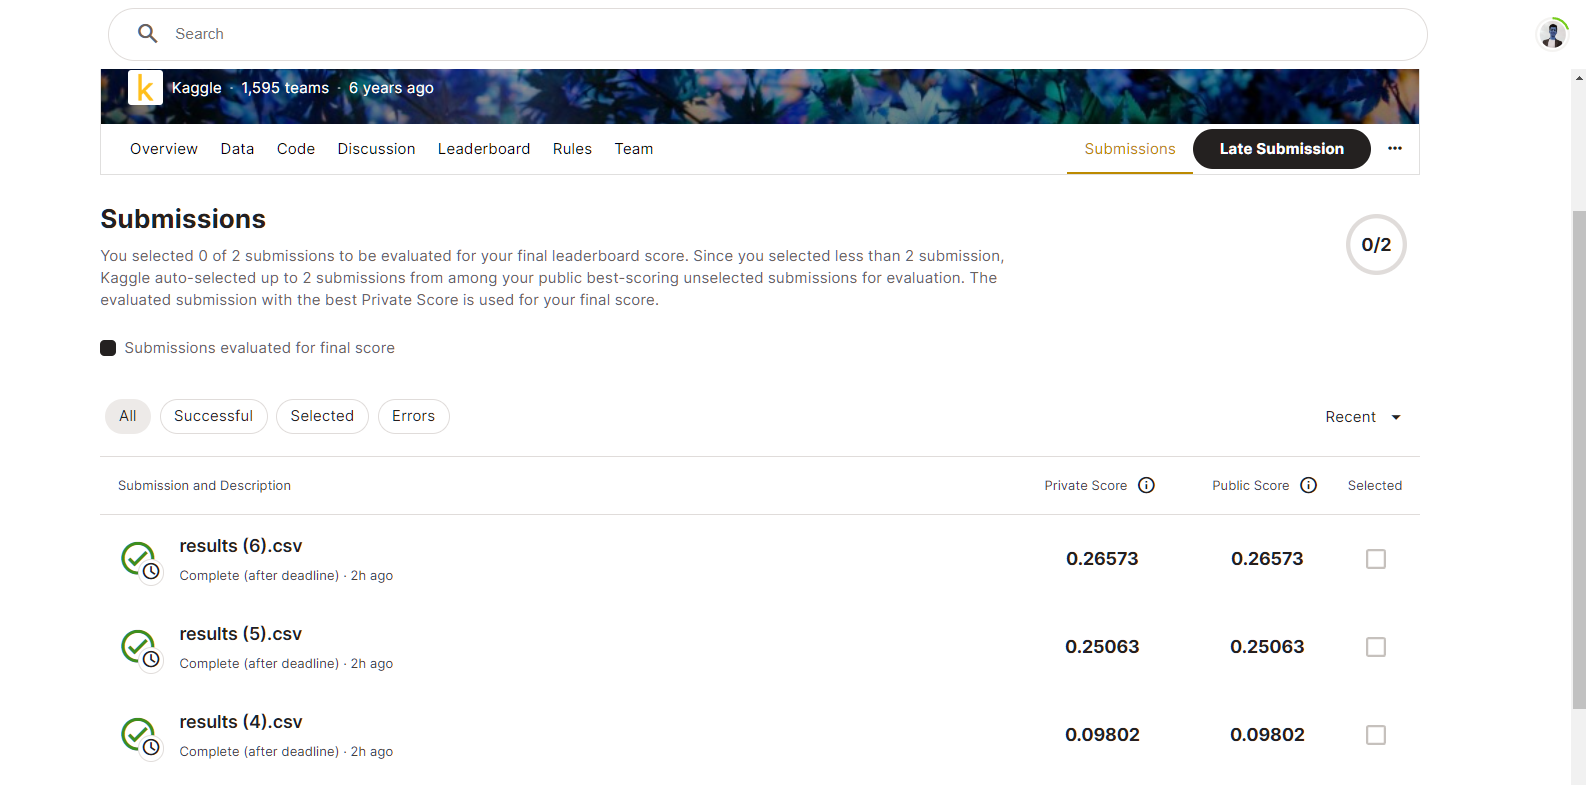

In [19]:
img_path = "kaggle.PNG"
image = io.imread(img_path)
cv2_imshow(image)